In [1]:
import numpy as np
import pandas as pd
from scipy.stats import probplot, norm
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import japanize_matplotlib
import seaborn as sns
sns.set(font='IPAexGothic')

In [2]:
# ファイルの読み込み
df = pd.read_csv('debutanizer_data.csv')

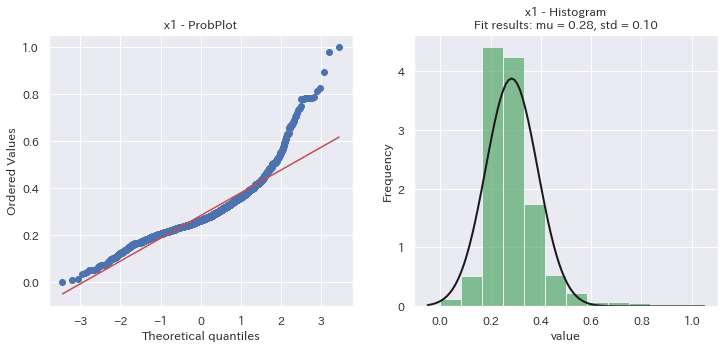

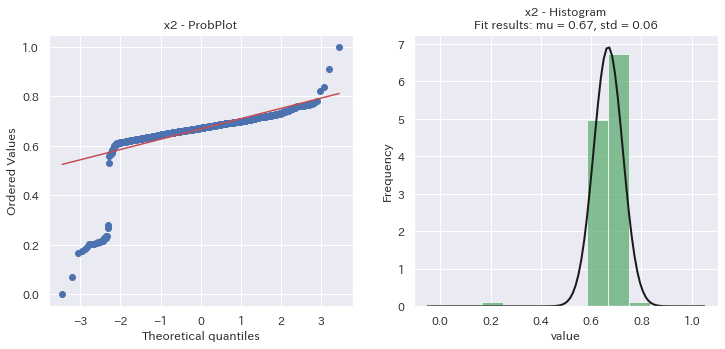

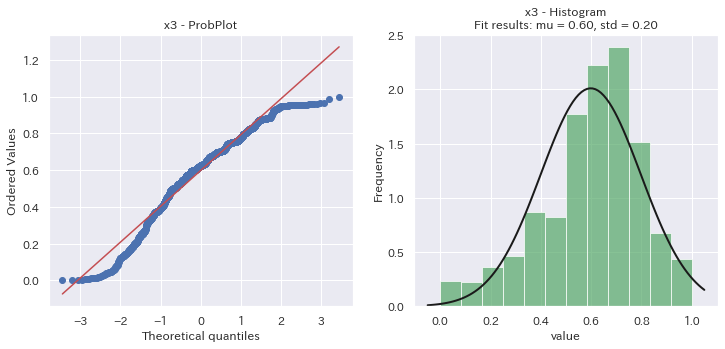

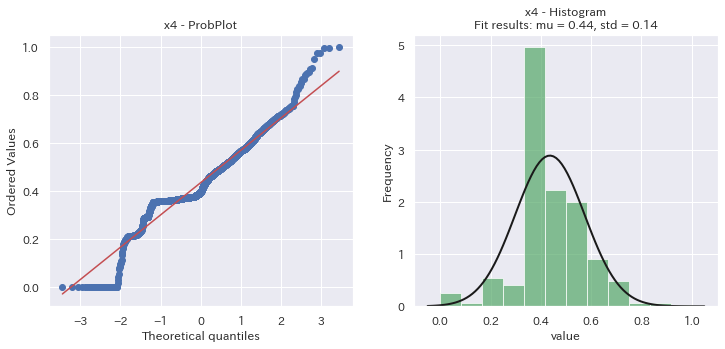

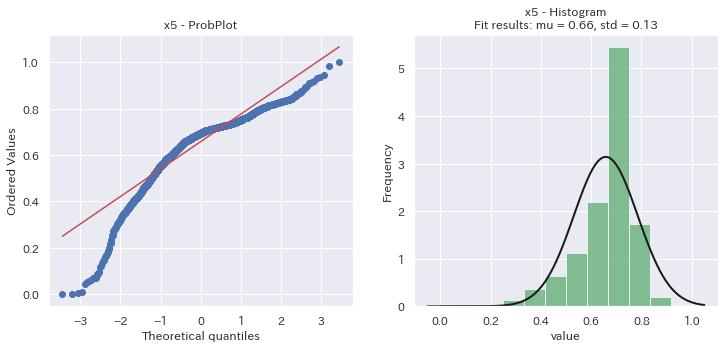

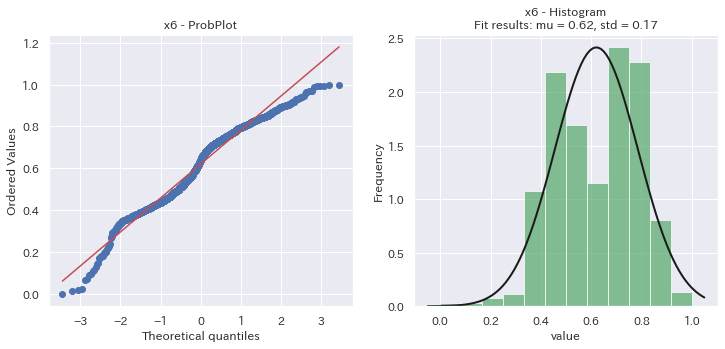

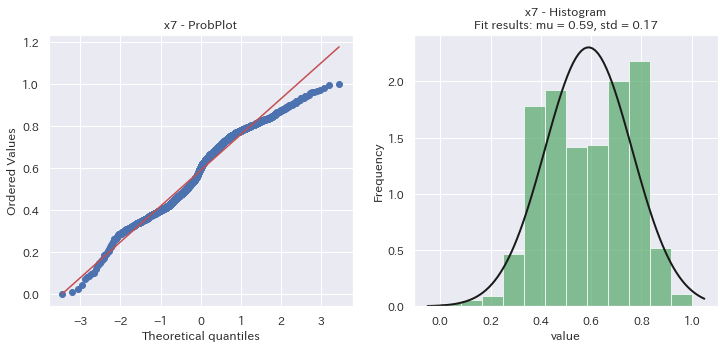

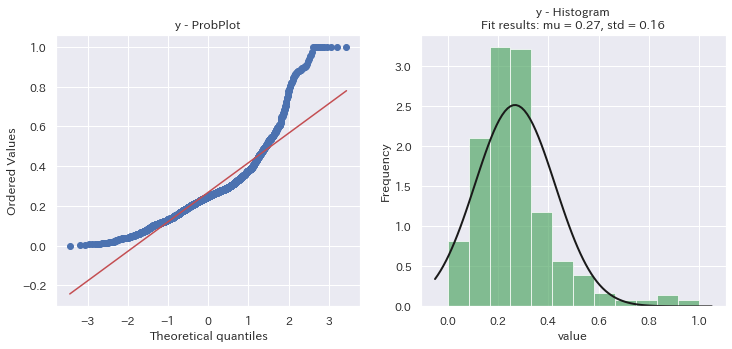

In [3]:
#pdfで保存するためpdfインスタンスを作成
pdf = PdfPages('qqplot_debutanizer.pdf')

#Q-Qプロット
for col in df.columns:
    df_col = df[col].dropna()
    fig, axes =plt.subplots(1, 2, figsize=(12,5))
    # 正規確率プロット
    probplot(df_col, dist="norm", plot=axes[0])
    axes[0].set_title(col + ' - ProbPlot')
    # ヒストグラム
    # ヒストグラムのbinの数を計算（スタージェスの公式）
    num_bins = int(np.log2(df_col.shape[0]) + 1)
    # ヒストグラムの表示(density=Trueで密度表示)
    axes[1].hist(df_col, bins=num_bins, density=True, alpha=0.7, color='g')
    mu, std = norm.fit(df_col)
    xmin, xmax = axes[1].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[1].plot(x, p, 'k', linewidth=2)
    axes[1].set_xlabel('value')
    axes[1].set_ylabel('Frequency')
    title_hist = f"{col} - Histogram\nFit results: mu = {mu:.2f}, std = {std:.2f}"
    axes[1].set_title(title_hist)
    plt.show()
    # グラフを保存
    pdf.savefig(fig)
    fig.savefig(f'{col}_qqplot.png')
    plt.close(fig)
#close処理
pdf.close()